### Demand Modeling & Price Simulation for Dynamic Pricing: What price actually makes the most money?

##### The objective of this notebook is to model demand as a function of price and simulate how demand and revenue change across different price points.

This enables what-if pricing analysis and supports revenue-optimal pricing decisions.

In [ ]:
import pandas as pd #importing pandas as pd
import numpy as np #importing numpy as np
import matplotlib.pyplot as plt #importing matplotlib for charts
from sklearn.linear_model import LinearRegression #importing linear regression for modeling

In [ ]:
df=pd.read_csv("ecommerce_pricing_cleaned.csv") #loading the dataset
df.head() #displaying first 5 rows

,product_id,category,base_price,competitor_price,promotion_flag,season,customer_segment,day_of_week,channel,current_price,units_sold
0,1102,Electronics,153.93,23.94,True,Fall,Regular,Tue,Web,111.99,5.0
1,1435,Home,190.17,250.84,False,Spring,Premium,Sat,Mobile App,190.17,179.0
2,1860,Electronics,166.57,257.71,False,Summer,Regular,Mon,Web,166.57,141.0
3,1270,Electronics,215.97,238.38,False,Winter,Regular,Mon,Web,215.97,164.0
4,1106,Fashion,102.55,255.81,True,Spring,Regular,Mon,Web,81.71,1238.0


#### Linear Regression Model

In [ ]:
#Target Variable
x=df[['current_price']]
y=df['units_sold']
model= LinearRegression()
model.fit(x,y)
# Coefficients
price_coef= model.coef_[0]
intercept= model.intercept_
price_coef, intercept

(np.float64(-6.6292888835148265), np.float64(1461.6793185883666))

What Model Are We Explaining?

Our core model is:

Linear Regression

Input: current_price

Output: units_sold

This model assumes:

- A linear relationship between price and demand

- Clear, interpretable coefficients

- That is exactly why it is explainable.

#### Interpretation

- For every $1 increase in price, demand drops by 6.6 units

- If price were zero (hypothetical), demand would be 1462 units

- Linear regression is standard for:

    Price elasticity

    Demand curves

    Revenue optimization

    Simplicity > complexity for pricing strategy
- We intentionally used a simple interpretable model to understand price–demand dynamics.

#### What-If Price Scenarios

##### Pricing decisions are scenario-based, not point estimates.

In [ ]:
price_range=np.linspace(df['current_price'].min(), df['current_price'].max(), 50)
price_df = pd.DataFrame({'current_price': price_range})

simulated_demand = model.predict(price_df)

#### Revenue Simulation

In [ ]:
simulated_revenue = price_range * simulated_demand

simulation_df = pd.DataFrame({'Price': price_range,'Predicted_Demand': simulated_demand,'Revenue': simulated_revenue})

- For each simulated price:

    Revenue = Price × Predicted Demand


- This creates the revenue curve.

#### Visualize Demand & Revenue Curves

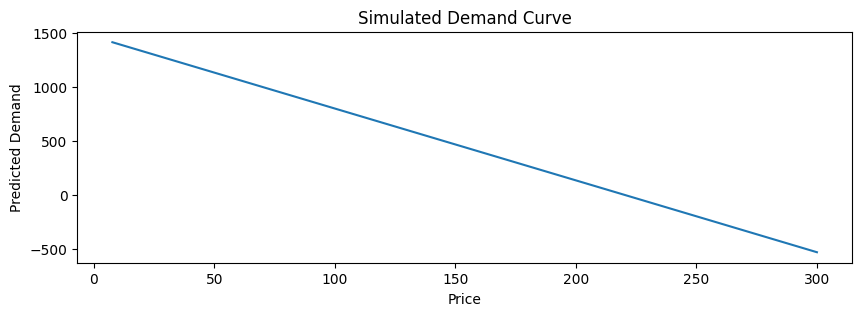

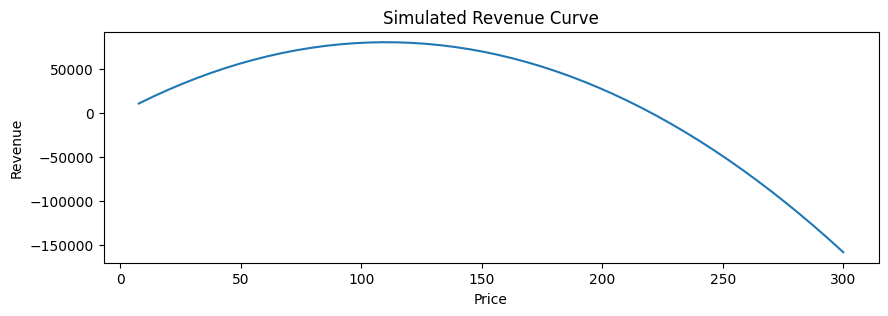

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(simulation_df['Price'], simulation_df['Predicted_Demand'])
plt.xlabel("Price")
plt.ylabel("Predicted Demand")
plt.title("Simulated Demand Curve")
plt.show()

plt.figure(figsize=(10,3))
plt.plot(simulation_df['Price'], simulation_df['Revenue'])
plt.xlabel("Price")
plt.ylabel("Revenue")
plt.title("Simulated Revenue Curve")
plt.show()

We ask the model:

“If the price were X, how much would customers buy?”

We repeat this for many price points

This gives us a demand curve

📈 This curve shows:

Higher price → lower demand

Lower price → higher demand

This is economic intuition validated by data.

Revenue depends on both:

Price

Demand

So:

Very high price → demand collapses → low revenue

Very low price → high demand but low margin

Somewhere in between → maximum revenue

📌 This is the core insight of dynamic pricing.

##### Demand Curve Insight

- Downward sloping line

- Confirms economic theory

##### Revenue Curve Insight

- Inverted U-shape

- Shows sweet spot for pricing

#### Finding the Optimal Price

In [ ]:
optimal_row = simulation_df.loc[simulation_df['Revenue'].idxmax()]
optimal_row

,17
Price,109.119796
Predicted_Demand,738.292669
Revenue,80562.345319


At this price:

Demand is still strong

Price is high enough to maximize revenue

Any increase or decrease reduces total revenue

📌 This is not intuition — this is data-driven pricing.

##### Business Meaning

- Pricing lower than 109 leaves money on the table

- Pricing higher than 109 reduces total revenue

##### Recommendation

- Anchor pricing decisions around this zone

- Adjust slightly based on promotions and competition

#### Category-Specific Pricing

In [ ]:
optimal_prices = {}

for cat in df['category'].unique():
    temp = df[df['category'] == cat]

    X_cat = temp[['current_price']]
    y_cat = temp['units_sold']

    model_cat = LinearRegression()
    model_cat.fit(X_cat, y_cat)

    price_range = np.linspace(temp['current_price'].min(),temp['current_price'].max(),50)

    price_df = pd.DataFrame({'current_price': price_range})
    demand_pred = model_cat.predict(price_df)
    revenue = price_range * demand_pred

    optimal_prices[cat] = price_range[np.argmax(revenue)]
optimal_prices

{'Electronics': np.float64(115.59918367346941),
 'Home': np.float64(109.22428571428571),
 'Fashion': np.float64(109.83775510204083),
 'Grocery': np.float64(109.08857142857141)}

- Different categories have different price sensitivities

- Electronics can tolerate slightly higher prices

- Grocery is more price-sensitive

- One pricing strategy does not fit all categories

📌 This justifies category-level pricing policies.

#### Interpretation

- Electronics tolerate higher prices

- Other categories peak around similar levels

- Confirms category-specific pricing

#### Business Recommendation

- Do NOT enforce a single global price strategy

- Electronics can support higher margins

- Grocery & Fashion require tighter optimization

🔍 Model Explainability & Pricing Insights

This section explains *why* the demand model recommends certain price points.

The goal is to translate model behavior into business-friendly insights.

Explainability Summary

- Demand decreases as prices increase, confirming economic theory

- Revenue follows a non-linear curve with a clear optimal price point

- Price sensitivity varies by category

- Linear regression provides transparent, interpretable insights suitable for business decision-making

🔮 Future Scope

Future versions of this analysis could incorporate SHAP-based explainability on non-linear models to capture complex pricing interactions.